# Personality Survey Data Analysis

In this notebook we will be looking at a personality survey data which over 1 million people have taken from all over the world.  The data was obtained from Kaggle:  https://www.kaggle.com/tunguz/big-five-personality-test

We are looking to answer the below questions:
    1.  Can we predict the person's country based on his survey answers?  
    2.  Can we predict a person's time spent on the survey based on his survey answers?
    3.  Are the questions in a group correlated with one another more than with other questions in other groups?
    4.  Can we predict the person's country more accurately if we ignore some survey answers?
    
We will be following the CRISP-DM process throughout.  This process involves the below phases for this project:
    1.  Business Understanding
    2.  Data Understanding
    3.  Prepare Data
    4.  Data Modeling
    5.  Evaluate the Results

We will annotate the section for each phase as we move along.

## CRISP-DM:  Business Understanding

A person's personality has been studied extensively by the pyschology community.  One of the models for personality is called the Big Five personality traits or the five-factor model (FFM).  This model groups personality into the 5 categories:  openness, conscientiousness, extraversion, agreeableness, and neuroticism (OCEAN acronym).  Based on the model, in order to understand a person's personality, we would have to measure their qualities in these categories.  The Open Psychometrics project attempted to do just this with a comprehensive survey created along the Big Five personality model.

Big Five Wiki:  https://en.wikipedia.org/wiki/Big_Five_personality_traits
Open Psychometrics Project:  https://openpsychometrics.org/tests/IPIP-BFFM/

## CRISP-DM:  Data Understanding

The data we are looking at involves a personality survey given to over 1 million people from around the world.  The survey was given along the framework of the Big Five personality traits.  There were 50 survey questions grouped into the five categories:  openness, conscientiousness, extraversion, agreeableness, and neuroticism.  The answers to the survey are in the range 0-5.  0 indicates that the question was not answered.  1 indicates they disagree with the question statement while 5 indicates they agree.  Respondents could answer with either 1, 2, 3, 4, or 5 indicating their level of agreement or disagreement with the statements.  The survey also contained other information about the respondent including the country they are from, the size of the screen they used for the survey, and the time they took in various parts of the survey.

The data also included a codebook which describes the data set in complete detail along with the meta-information involved.

Based on this data, we would like to know what, if anything, we can predict about the respondent given the survey answers they gave.

Let's read in the data and take a look.  There are 2 csv files involved:  the survey answers and the codebook describing the survey.

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the data, it's a large file with over 1 million rows and 100 columns.
pers = pd.read_csv('./data-final.csv', sep='\t')

#### The data has 110 columns which includes the 50 question answers and the metadata.

In [2]:
# Show a sample of the data
pers.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


#### The codebook has a listing of columns and their descriptions.

In [3]:
# Read in the codes which describes the data, especially the different questions that were asked
codes = pd.read_csv('./codebook.txt', sep='\t', skiprows=(0,1,2,3,4,5), names=['Code', 'Description'])

# Show a sample of the data
codes.head()

,Code,Description
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.


In [4]:
# Check shapes
print(pers.shape)
print(codes.shape)

(1015341, 110)
(61, 2)


## CRISP-DM:  Prepare Data

We will now look more closely at the data from the survey and prepare it for our use using python and pandas.  

#### As part of the data preparation, we will look for null and take the proper subset of data in the codebook.

In [5]:
# Examine codes for any nulls
print(codes.isnull().sum())

# Take meaningful subset, first 50 rows for the questions
codes = codes[0:50]

# Show all the questions
codes

Code            0
Description    11
dtype: int64


,Code,Description
0,EXT1,I am the life of the party.
1,EXT2,I don't talk a lot.
2,EXT3,I feel comfortable around people.
3,EXT4,I keep in the background.
4,EXT5,I start conversations.
5,EXT6,I have little to say.
6,EXT7,I talk to a lot of different people at parties.
7,EXT8,I don't like to draw attention to myself.
8,EXT9,I don't mind being the center of attention.
9,EXT10,I am quiet around strangers.


#### Continuing the data preparation we will eliminate the missing data in the survey answers as well.  This is mostly blank lines at the end of the survey data csv file.

In [6]:
# Examine questionnaire for nulls
print(pers.isnull().sum())

# Remove missing data, mostly trailing blank lines from the data file
pers.dropna(inplace=True)

# Show remaining shape
pers.shape

EXT1                     1783
EXT2                     1783
EXT3                     1783
EXT4                     1783
EXT5                     1783
EXT6                     1783
EXT7                     1783
EXT8                     1783
EXT9                     1783
EXT10                    1783
EST1                     1783
EST2                     1783
EST3                     1783
EST4                     1783
EST5                     1783
EST6                     1783
EST7                     1783
EST8                     1783
EST9                     1783
EST10                    1783
AGR1                     1783
AGR2                     1783
AGR3                     1783
AGR4                     1783
AGR5                     1783
AGR6                     1783
AGR7                     1783
AGR8                     1783
AGR9                     1783
AGR10                    1783
                         ... 
CSN1_E                   1783
CSN2_E                   1783
CSN3_E    

(1012050, 110)

#### Continuing the data preparation, now let's just extract the questions/answers portion of the data, eliminating all the meta-data.  This will be useful later for modeling.

In [7]:
# Extract just the questions portion
questions = pers.loc[:, 'EXT1':'OPN10']

# Show the questions shape and a sample
print(questions.shape)
questions.head()

(1012050, 50)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


In [23]:
# Extract just the countries portion, will be useful later for modeling
countries_cat = pers['country'].astype('category').cat.codes

#### Let us switch back to data understanding in the process as we examine the data more closely.

#### To help us visualize the data, let's create some functions to create heatmaps and histograms

In [9]:
import seaborn as sns

# Create a function to show the heatmap
def show_heatmap(data):
    """ 
    For the given data, show the heatmap after computing the correlation
    Parameters: 
    data (DataFrame): The input data we want a heatmap for
  
    Returns: 
    <Nothing> A heatmap will be displayed
    """
    corr = data.corr()
    sns.heatmap(corr)

In [10]:
# Create a function to show a histogram plot
def show_histogram(data, title):
    """ 
    For the given data, show the histogram of values
    Parameters: 
    data (DataFrame): The input data we want a histogram for
    title (str):  The title of the histogram
  
    Returns: 
    <Nothing> A heatmap will be displayed
    """    
    data.plot(kind="bar", figsize=(28, 8));
    plt.title(title);

#### Continuing with the data understanding, let's look at the correlation amongst the questions/answers.

In [11]:
# Compute the correlation
corr = questions.corr()
corr.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
EXT1,1.000000,-0.439176,0.464833,-0.486689,0.478206,-0.323423,0.581693,-0.368139,0.470624,-0.410394,...,0.033424,0.002407,0.079600,0.020569,0.186461,-0.059893,0.074705,0.017170,-0.064237,0.167155
EXT2,-0.439176,1.000000,-0.412273,0.552552,-0.500538,0.541775,-0.444535,0.397786,-0.364068,0.490812,...,-0.026528,0.055771,-0.020358,0.041261,-0.094361,0.093033,-0.016234,-0.016693,0.080863,-0.106235
EXT3,0.464833,-0.412273,1.000000,-0.433449,0.554566,-0.321947,0.540954,-0.291678,0.422393,-0.433824,...,0.038616,-0.025293,0.033988,0.014633,0.175156,-0.034684,0.135601,-0.026898,-0.040517,0.139018
EXT4,-0.486689,0.552552,-0.433449,1.000000,-0.459715,0.457623,-0.465724,0.488740,-0.434490,0.538443,...,-0.004476,0.083356,0.051647,0.053089,-0.101086,0.082407,-0.023546,0.014438,0.139391,-0.079120
EXT5,0.478206,-0.500538,0.554566,-0.459715,1.000000,-0.409655,0.588810,-0.312272,0.421797,-0.486922,...,0.090748,-0.036565,0.098615,-0.021563,0.220704,-0.076758,0.130984,0.058280,0.026923,0.208603


#### Based on this heatmap below you can see that there are 5 correlated boxes of questions along the diagonal.  The orange and black colors in those boxes show that there is a strong positive correlation for some of the questions in the group for orange and a strong negative correlation for some of the questions in the group for black.

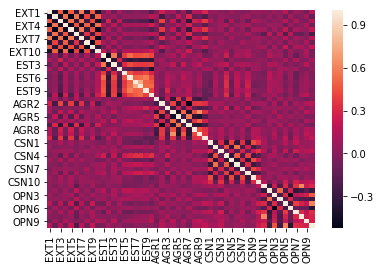

In [12]:
show_heatmap(questions)

### Based on the table below you can see which survey questions were left blank most often.  It seems that some of the stronger statements are the ones people had the most difficulty in answering.

      Missing Answers             Description
CSN1            12174   I am always prepared.
EST6            10837     I get upset easily.
EST4            10640     I seldom feel blue.
AGR6            10348    I have a soft heart.
EXT5             9761  I start conversations.
      Missing Answers                                      Description
OPN2             5936  I have difficulty understanding abstract ideas.
EST3             5506                            I worry about things.
AGR3             5013                                 I insult people.
AGR1             4952                I feel little concern for others.
EXT1             3717                      I am the life of the party.


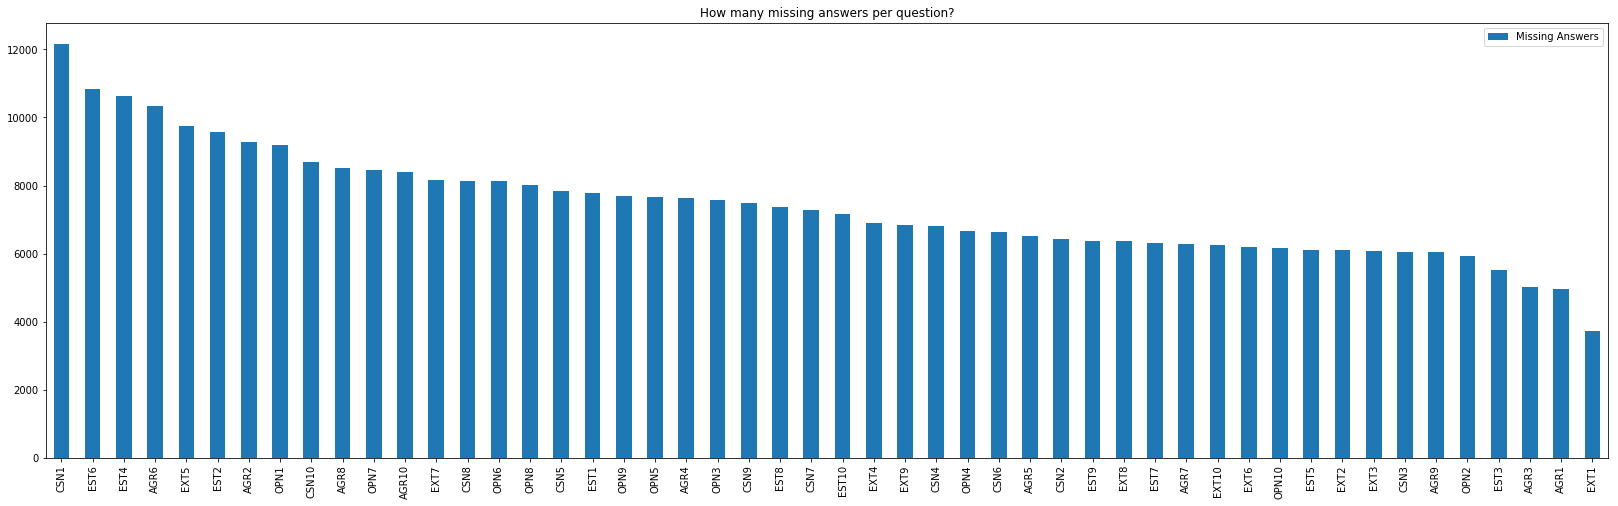

In [13]:
# Find how many zeros are in the survey representing missing answers
zeros = (questions == 0.0).sum().to_frame(name='Missing Answers')

# Show which questions had the most missing answers
codes = codes.set_index('Code')
codes.head()
zeros_sorted = zeros.join(codes).sort_values(by='Missing Answers', ascending=False)
print(zeros_sorted.head())
print(zeros_sorted.tail())

# Plot a histogram for the missing answers
show_histogram(zeros_sorted, "How many missing answers per question?")

#### Continuing with data understanding, now let's look at the countries involved with the survey. 

### Based on the histogram below, you can see that the respondents mostly came from the US and a few other major countries with far fewer responses from other countries.

US    545414
GB     66373
CA     61751
AU     49595
PH     19839
Name: country, dtype: int64

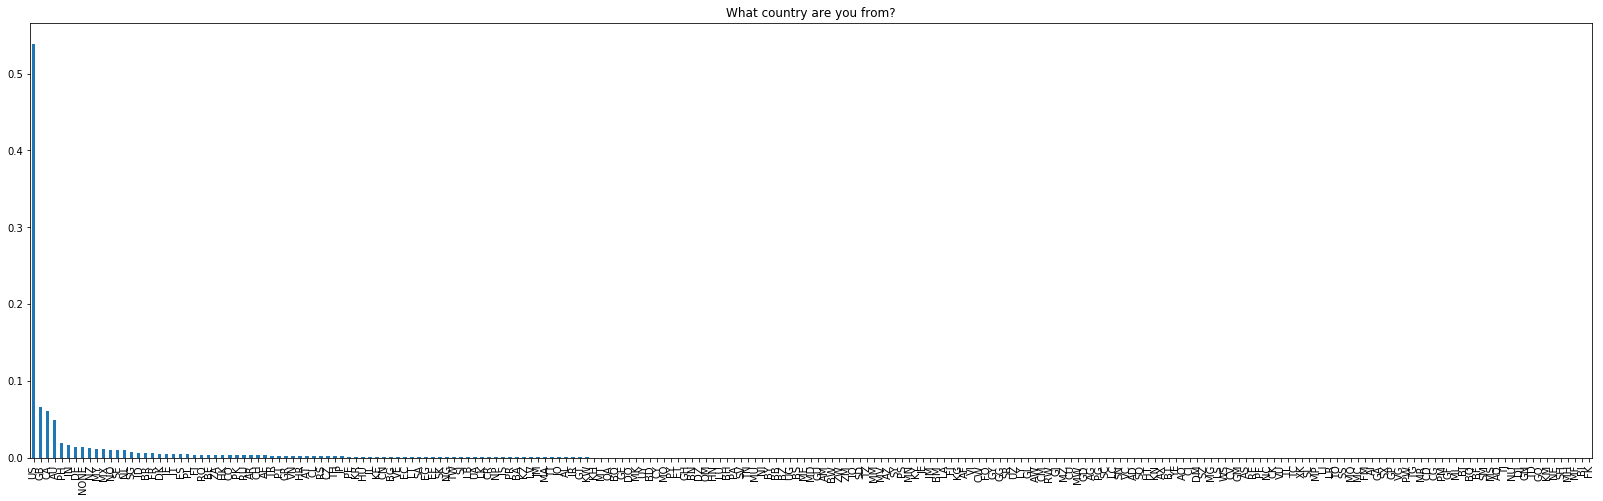

In [14]:
# Let's show the countries involved in the survey
countries = pers['country'].value_counts()

show_histogram(countries/pers.shape[0], "What country are you from?")
countries.head()

#### Continuing with data understanding, let's look at the time spent on the main survey below.  You can see the wide variance between respondents who took 100 seconds to complete the survey versus 4,000 or more seconds to complete it.

In [15]:
# Find the time spent on the survey for various countries
intro = pers.groupby('country')['introelapse'].mean().sort_values(ascending=False)
test = pers.groupby('country')['testelapse'].mean().sort_values(ascending=False)
end = pers.groupby('country')['endelapse'].mean().sort_values(ascending=False)

In [16]:
# show the top and bottom countries in terms of time spent in the test
print(test.head())
print(test.tail())

country
AF    27574.018519
MV     8276.695122
JE     5780.888889
UA     5484.616622
VC     4197.944444
Name: testelapse, dtype: float64
country
BT    207.785714
VU    191.571429
CD    189.000000
BF    155.000000
MS    101.500000
Name: testelapse, dtype: float64


#### Continuing with the data understanding phase, let's now look at the screen sizes for the respondents by country.  Does a particular technology platform cause a wide difference between countries, e.g. mobile phone versus laptop or desktop computer?

In [17]:
# Find the average screen sizes for each country
width = pers.groupby('country')['screenw'].mean()
height = pers.groupby('country')['screenh'].mean()
dim = pd.concat([height, width], axis=1)

#### The below likely shows the different devices that are prevalent in each country from mobile phones to desktop computers.  This also shows how advanced those devices are with higher resolutions indicating the latest technology is being used with higher definition screens

In [18]:
# Show the top and bottom countries for the dimensions
print(dim.sort_values('screenw').head())
print(dim.sort_values('screenw').tail())
print(dim.sort_values('screenh').head())
print(dim.sort_values('screenh').tail())

            screenh     screenw
country                        
FK       568.000000  320.000000
SM       640.000000  360.000000
GQ       640.000000  360.000000
MR       801.333333  487.666667
HT       709.266667  719.133333
             screenh  screenw
country                      
SH       1050.000000   1680.0
MF       1050.000000   1680.0
CU        960.666667   1689.5
AQ       1140.000000   1920.0
MS       1080.000000   1920.0
            screenh     screenw
country                        
FK       568.000000  320.000000
GQ       640.000000  360.000000
SM       640.000000  360.000000
CG       685.333333  988.666667
GM       701.900000  977.600000
             screenh  screenw
country                      
CU        960.666667   1689.5
MF       1050.000000   1680.0
SH       1050.000000   1680.0
MS       1080.000000   1920.0
AQ       1140.000000   1920.0


## CRISP-DM:  Data Modeling

Now we will move on to the data modeling phase of CRISP-DM.  Here we will model the data using various models and try to predict using that model.  

Now let us try to predict the country based on the survey answers.  We will use the question answers to predict various meta-data from the survey results.

#### Let's create a function to split the data into training and test data sets, hiding some of the details

In [19]:
from sklearn.model_selection import train_test_split

# Create a function to split the test and train data, hiding some of the details
def split_data(inputs, outputs):
    """ 
    Split data for training and testing for use with regression models.
  
    Parameters: 
    inputs (DataFrame): The input data we are predicting with.
    outputs (DataFrame):  The output we are trying to predict
  
    Returns: 
    (X_train, X_test, y_train, y_test): The data split randomly into the training and data sets inputs and ouputs
    """
    return train_test_split(inputs, outputs, test_size=0.3, random_state=42)

#### Let's also create a function to print out the model results, showing the final accuracy score

In [20]:
# Show accuracy function to print the model's results
def show_accuracy(output, output_predicted):
    """ 
    Show the model's accuracy based on outputs expected versus predicted.
    
    Parameters: 
    output (DataFrame): The expected output values.
    output_predicted (DataFrame):  The predicted output values.
  
    Returns: 
    Nothing.  Prints the accuracy score.
    """
    print("Accuracy score:  ", accuracy_score(output, output_predicted))

#### Continuing with data modeling, let's try to predict the country of the respondent based on the questions using LogisticRegression from scikit-learn

In [24]:
# questions has the question data
# countries has the country data

# split the data into training and test data
X_train, X_test, y_train, y_test = split_data(questions, countries_cat)

In [25]:
from sklearn.linear_model import LogisticRegression

# Create and fit the logistic regression model, perfect for classification prediction
log_model = LogisticRegression(solver='lbfgs', multi_class='auto', verbose=10, max_iter=100)
log_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.9min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=10, warm_start=False)

## CRISP-DM:  Evaluate the Results

In this final phase of CRISP-DM for this project, we will evaluate the results of the model we created using the survey answers.  We will predict various outputs and compare them with the expected outputs to come up with a model accuracy score.

#### Here we will predict the country and evaluate the results.

#### The accuracy of our model is 53.8%, ok but not great.  This seems to indicate that the survey answers cannot help pinpoint a person to a particular country very well.  Could it be that people really are unique all over the world?  Let's try to predict using a couple of other model types as well.

In [26]:
from sklearn.metrics import accuracy_score

# Predict based on the model
y_test_preds = log_model.predict(X_test) 

# Print the results
show_accuracy(y_test, y_test_preds)

Accuracy score:   0.53807947565173


#### Continuing data modeling, let's try to use the K Nearest Neighbors Classifier to predict country

We need to look at only a subset of the data as KNN takes much too long to make predictions.

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN model, perfect for classification prediction
# Only use a subset of the training data as KNN is very slow!!
knn = KNeighborsClassifier(n_neighbors=len(countries_cat.unique()))
knn.fit(X_train[:100000], y_train[:100000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=223, p=2,
           weights='uniform')

#### Now we are evaluating the results of the KNN classifier.

#### KNN performed slightly worse to logistic regression, but in line with 52.8% accuracy.

In [28]:
from sklearn.metrics import accuracy_score

y_test_preds = knn.predict(X_test[:1000])

show_accuracy(y_test[:1000], y_test_preds[:1000])

Accuracy score:   0.528


### Back to data modeling, now let's try a final classifier:  the decision tree classifer

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Now let's evaluate the results of the decision tree classifier.

#### Decision tree was the worst performed with only 31.7% accuracy.

In [30]:
from sklearn.metrics import accuracy_score

y_test_preds = dt_model.predict(X_test)

show_accuracy(y_test, y_test_preds)

Accuracy score:   0.3171747113943646


#### Now let's try to only predict based on the top 20 columns that are correlated with the country. 

#### To do this first we will do some data preparation in order to isolate the top 20 correlated questions.

In [31]:
# Get the questions and country together
qandc = questions.astype(int)
qandc['country'] = countries_cat
qandc.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4,1,5,2,5,1,5,2,4,1,...,1,4,1,4,1,5,3,4,5,69
1,3,5,3,4,3,3,2,5,1,5,...,2,4,2,3,1,4,2,5,3,144
2,2,3,4,4,3,2,1,3,2,5,...,1,2,1,4,2,5,3,4,4,69
3,2,2,2,3,4,2,2,4,1,4,...,2,5,2,3,1,4,4,3,3,69
4,3,3,3,3,5,3,3,5,3,4,...,1,5,1,5,1,5,3,5,5,103


In [52]:
# Take the correlation for each question to the country
corr = qandc.corr()['country']
corr = corr.reset_index()
corr.head()

,index,country
0,EXT1,0.016791
1,EXT2,-0.020286
2,EXT3,0.028436
3,EXT4,-0.009885
4,EXT5,0.015496


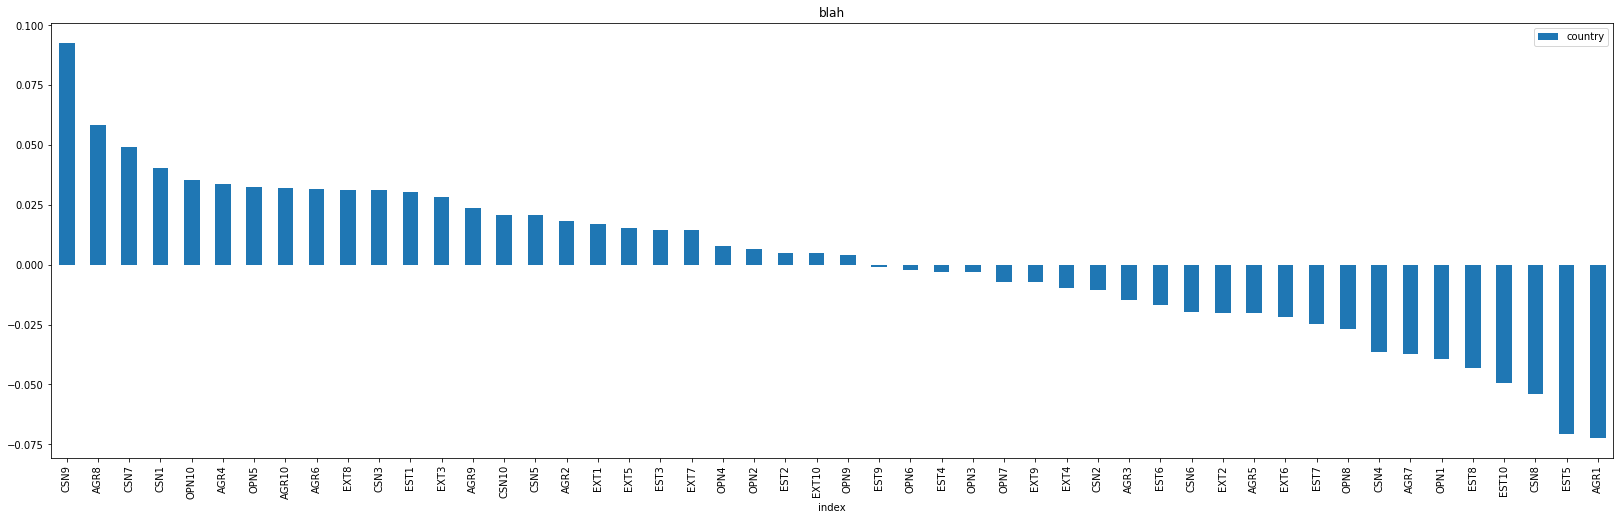

In [72]:
# Show a histogram of the top corelated questions to country
hist = corr.sort_values(by='country', ascending=False)
hist.set_index('index', inplace=True)
hist.drop('country', axis=0, inplace=True)
show_histogram(hist, "blah")

In [33]:
# Find the most highly correlated 20 columns
# We take 21 columns because country will be included (perfectly correlated)
topcols = corr.sort_values('country', ascending=False).head(21)['index'].to_list()

# Take those best questions and remove the country
topquestions = qandc[topcols].copy()
topquestions.drop('country', axis=1, inplace=True)
topquestions.head()

,CSN9,AGR8,CSN7,CSN1,OPN10,AGR4,OPN5,AGR10,AGR6,EXT8,CSN3,EST1,EXT3,AGR9,CSN10,CSN5,AGR2,EXT1,EXT5,EST3
0,4,4,4,3,5,4,4,4,3,2,3,1,5,3,4,2,5,4,5,4
1,5,4,3,3,3,5,3,3,5,5,5,2,3,5,3,3,4,3,3,4
2,4,4,4,4,4,4,4,3,4,3,2,4,4,4,2,3,4,2,3,4
3,1,4,2,2,3,4,3,4,4,4,4,3,2,3,4,1,4,2,4,3
4,5,5,5,5,5,5,5,3,3,5,5,1,3,5,5,3,5,3,5,5


In [34]:
# Let's train on this subset of data and see if it improves our prediction
X_train, X_test, y_train, y_test = split_data(topquestions, countries_cat)

#### Now we move to the data modeling phase and perform logistic regression on this subset of data

In [35]:
from sklearn.linear_model import LogisticRegression

# Use logistic regression just like before
log_model = LogisticRegression(solver='lbfgs', multi_class='auto', verbose=10, max_iter=100)
log_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.7min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.7min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=10, warm_start=False)

#### Finally we move to the evaluate the results phase and show the results

#### Reducing the number of features did not help with the prediction which held steady at 53.8%. 

In [36]:
from sklearn.metrics import accuracy_score

y_test_preds = log_model.predict(X_test) 

show_accuracy(y_test, y_test_preds)

Accuracy score:   0.5383429672447013


#### Now we move back to data preparation phase as we look into the final question.  Let's look at predicting the time it takes folks to complete the survey.  Can this be predicted based on the answer pattern?

In [37]:
# Combine the times for the intro, survey, and end into one column.
times = pers['introelapse'] + pers['testelapse'] + pers['endelapse'].astype('float')
times.head()

0    249.0
1    202.0
2    196.0
3    412.0
4    340.0
dtype: float64

In [38]:
# Split the data
X_train, X_test, y_train, y_test = split_data(questions, times)

#### Now we move to the data modeling phase for a final time as we use Linear Regression to try to predict the time spent on the survey

In [39]:
from sklearn.linear_model import LinearRegression

# Linear regression this time, the output is a number
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) #Fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

#### And finally we move to evaluate the results phase to show the prediction results.

### Not a very good result, the prediction is hardly more than a guess.  This shows that test time cannot be predicted based on just the survey answers.

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

# Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for your model was -2.9730613431144803e-06 on 303615 values.'